
# Análisis y Modelado con Árboles de Decisión

En este notebook, realizaremos un análisis y modelado utilizando árboles de decisión. Los árboles de decisión son una herramienta poderosa en aprendizaje automático para tareas de clasificación y regresión.



## Importación de Bibliotecas

Antes de comenzar con cualquier análisis o modelado, es esencial importar las bibliotecas necesarias. En este caso, vamos a usar `pandas` para el manejo de datos y `matplotlib` para visualización.


In [245]:
import pandas as pd
import matplotlib.pyplot as plt


## Importación y Exploración Inicial de los Datos

Para cualquier proyecto de análisis de datos o aprendizaje automático, el primer paso es cargar y comprender los datos. Vamos a importar un conjunto de datos y realizar un análisis descriptivo inicial.


In [246]:
#Importación de datos
Dataset = pd.read_csv("C:/Users/lfvvi/OneDrive/Documentos/ESCRITORIO/DS - SELF LEARNING/MACHINE LEARNING/1. SUPERVISED/3. Decision Trees (DT)/Python/DataSet.csv")

#Análisis descriptivo de los datos
Dataset.describe(include="all")

,outlook,temp.,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,6,6,7,8,9


In [247]:
Dataset.head(n=14)

,outlook,temp.,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainny,mild,high,False,yes
4,rainny,cool,normal,False,yes
5,rainny,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,sunny,mild,normal,False,yes



## Preprocesamiento de Datos

El preprocesamiento es un paso esencial antes de modelar. En este caso, estamos convirtiendo categorías a formato numérico usando one-hot encoding. Esto es necesario ya que muchos algoritmos de aprendizaje automático requieren que la entrada sea numérica.


In [248]:
Dataset_Dummies = pd.get_dummies(Dataset, columns=["outlook", "temp.", "humidity", "windy", "play"])
Dataset_Dummies

Dataset_Dummies_Modified = Dataset_Dummies.drop(["play_no", "windy_False", "humidity_normal" ],axis=1)
Dataset_Dummies_Modified

,outlook_overcast,outlook_rainny,outlook_sunny,temp._cool,temp._hot,temp._mild,humidity_high,windy_True,play_yes
0,0,0,1,0,1,0,1,0,0
1,0,0,1,0,1,0,1,1,0
2,1,0,0,0,1,0,1,0,1
3,0,1,0,0,0,1,1,0,1
4,0,1,0,1,0,0,0,0,1
5,0,1,0,1,0,0,0,1,0
6,1,0,0,1,0,0,0,1,1
7,0,0,1,0,0,1,1,0,0
8,0,0,1,1,0,0,0,0,1
9,0,0,1,0,0,1,0,0,1


In [249]:
Dataset_Dummies_Modified.columns = ['Overcast', 'Rain', 'Sunny', 'Cool',
       'Hot', 'Mild', 'Humidity', 'Windy', 'Play']
Dataset_Dummies_Modified

,Overcast,Rain,Sunny,Cool,Hot,Mild,Humidity,Windy,Play
0,0,0,1,0,1,0,1,0,0
1,0,0,1,0,1,0,1,1,0
2,1,0,0,0,1,0,1,0,1
3,0,1,0,0,0,1,1,0,1
4,0,1,0,1,0,0,0,0,1
5,0,1,0,1,0,0,0,1,0
6,1,0,0,1,0,0,0,1,1
7,0,0,1,0,0,1,1,0,0
8,0,0,1,1,0,0,0,0,1
9,0,0,1,0,0,1,0,0,1


## División de Datos en Conjuntos de Entrenamiento y Prueba

Dividir los datos en conjuntos de entrenamiento y prueba es crucial para evaluar el rendimiento de nuestro modelo. Usamos una parte de los datos para entrenar el modelo y el conjunto restante para evaluarlo.


In [250]:
from sklearn.model_selection import train_test_split
Y = Dataset_Dummies_Modified['Play']
X = Dataset_Dummies_Modified.drop('Play',axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)


## Construcción del Árbol de Decisión

Ahora, construimos un árbol de decisión usando la biblioteca `sklearn`. También visualizamos el árbol para entender mejor cómo hace las decisiones.


In [251]:
Tag_Names = Dataset_Dummies_Modified.columns

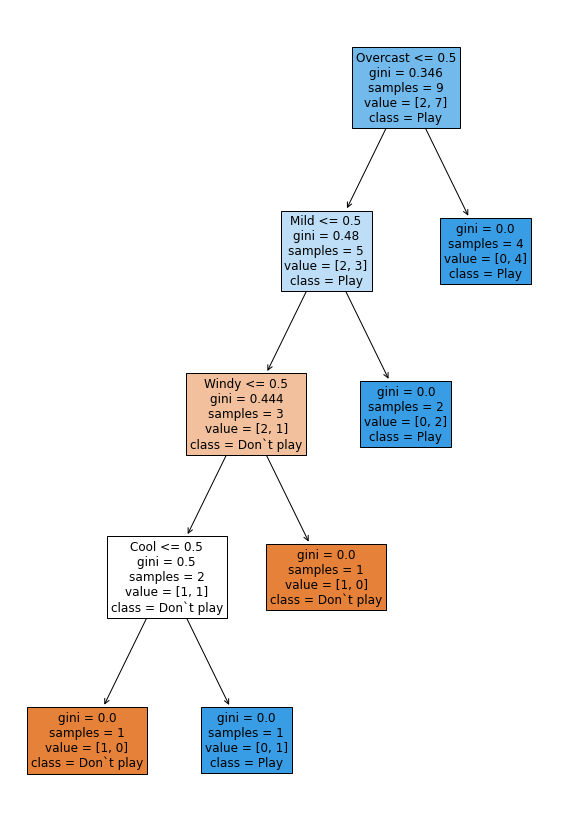

In [252]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

CLF = DecisionTreeClassifier(ccp_alpha=0.01)
CLF= CLF.fit(X_train,Y_train)

fig = plt.figure(figsize=(10,15))
result = tree.plot_tree(CLF,
                   feature_names=Tag_Names,
                   class_names={0:'Don`t play', 1:'Play'},
                   filled=True,
                  fontsize=12)


## Evaluación del Modelo

Una vez que el modelo está entrenado, hacemos predicciones en el conjunto de prueba y evaluamos su rendimiento usando diferentes métricas.


In [253]:
predictions = CLF.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions, target_names=['Don`t play','Play']))

              precision    recall  f1-score   support

  Don`t play       1.00      0.33      0.50         3
        Play       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



## Interpretación de Métricas de Clasificación

### Precision (Precisión)

**Definición:** La precisión es la proporción de identificaciones positivas (predicciones positivas) que fueron realmente correctas. Se calcula como:

$$
\text{Precisión} = \frac{\text{Verdaderos Positivos (VP)}}{\text{Verdaderos Positivos (VP) + Falsos Positivos (FP)}}
$$

**Interpretación:** Una precisión alta indica que, cuando el modelo predice la clase positiva, es muy probable que esté correcto.

### Recall (Exhaustividad o Sensibilidad)

**Definición:** El recall es la proporción de positivos reales que fueron identificados correctamente. Se calcula como:

$$
\text{Recall} = \frac{\text{Verdaderos Positivos (VP)}}{\text{Verdaderos Positivos (VP) + Falsos Negativos (FN)}}
$$

**Interpretación:** Un recall alto indica que el modelo es capaz de identificar la mayoría de las instancias positivas reales.

### F1-Score

**Definición:** Es una métrica que combina precisión y recall en una sola cifra. Es la media armónica de precisión y recall y se calcula como:

$$
\text{F1-Score} = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}
$$

**Interpretación:** El F1-Score es útil cuando se desea tener un balance entre precisión y recall. Un F1-Score alto indica que el modelo tiene una buena precisión y recall simultáneamente.

### Accuracy (Exactitud)

**Definición:** La exactitud es la proporción de predicciones correctas entre el número total de observaciones. Se calcula como:


$$\text{Exactitud} = \frac{\text{Verdaderos Positivos (VP) + Verdaderos Negativos (VN)}}{\text{Total de Observaciones}}$$

**Interpretación:** Indica cuántas predicciones el modelo hizo correctamente de todas las predicciones. Sin embargo, en conjuntos de datos desequilibrados, la exactitud puede no ser una buena métrica.

### Macro Avg y Weighted Avg

- **Macro Avg:** Calcula la métrica independientemente para cada clase y luego toma el promedio (sin considerar el desbalance entre clases).
- **Weighted Avg:** Calcula la métrica para cada clase, pero da peso a cada métrica según el número de instancias reales para cada clase.

---

Estas métricas proporcionan diferentes perspectivas sobre el rendimiento del modelo y, dependiendo del contexto y la importancia de cada tipo de error (falsos positivos vs. falsos negativos), se puede dar prioridad a una métrica sobre otra.


## Referencia Adicional

A continuación, se proporciona un enlace a un repositorio de GitHub que puede contener información relevante o adicional sobre árboles de decisión.

https://github.com/misraturp/Decision-Tree-Implementation/blob/main/Decision%20Trees%20with%20Scikitlearn.ipynb